# Vehicle Price Prediction
Estimate the selling price of cars based on the features of a car.

In [1]:
# import all required libraries for reading, analysing and visualizing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis

In [2]:
# read the data from the csv file
details = pd.read_csv('./dataset/carDetails.csv')

In [3]:
details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
print('Dataset shape: ', details.shape)

Dataset shape:  (8128, 13)


In [5]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
details.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
# check if any of the columns has null values
details.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

## Data Visualization

### Selling price vs Fuel type

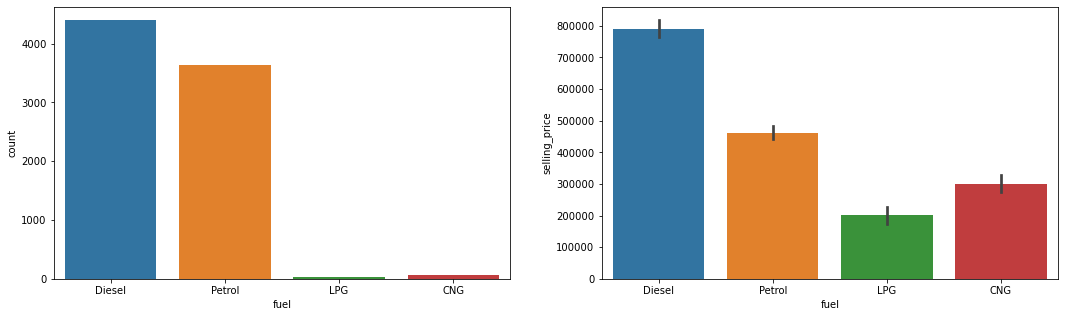

In [8]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.countplot(x = 'fuel', data = details, ax = axis1)
sns.barplot(x = 'fuel', y = 'selling_price', data = details, ax = axis2);

Thus we can see that most of the cars of Diesel and Petrol type, and the selling price of Diesel cars are maximum follwed by Petrol, CNG and LPG.

### Selling price vs Transmission type

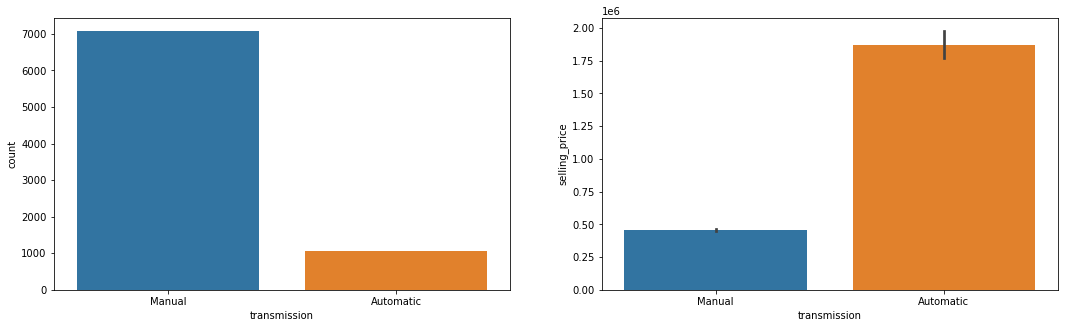

In [9]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.countplot(x = 'transmission', data = details, ax = axis1)
sns.barplot(x = 'transmission', y = 'selling_price', data = details, ax = axis2);

Thus from the above plots we can infer that most cars have Manual transmission and the price of cars having automatic transmission are way higher than of Manual type.

### Selling price vs Seller type

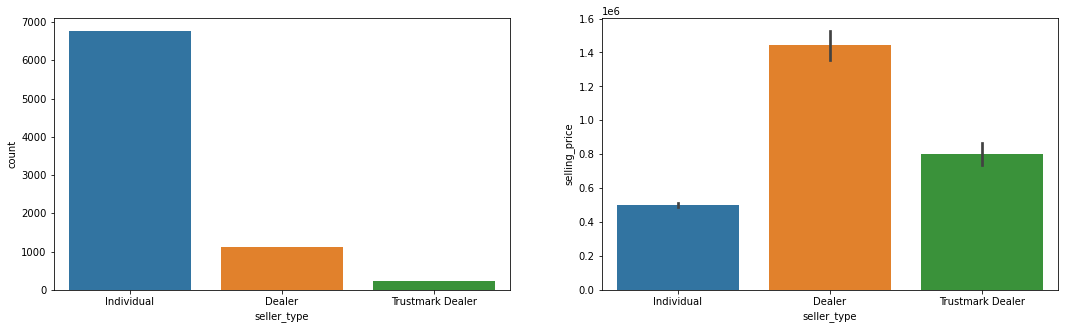

In [10]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.countplot(x = 'seller_type', data = details, ax = axis1)
sns.barplot(x = 'seller_type', y = 'selling_price', data = details, ax = axis2);

Thus most of the cars sold by Individual sellers but the Dealers charge the highest price for the cars.

### Selling price vs Purchase year

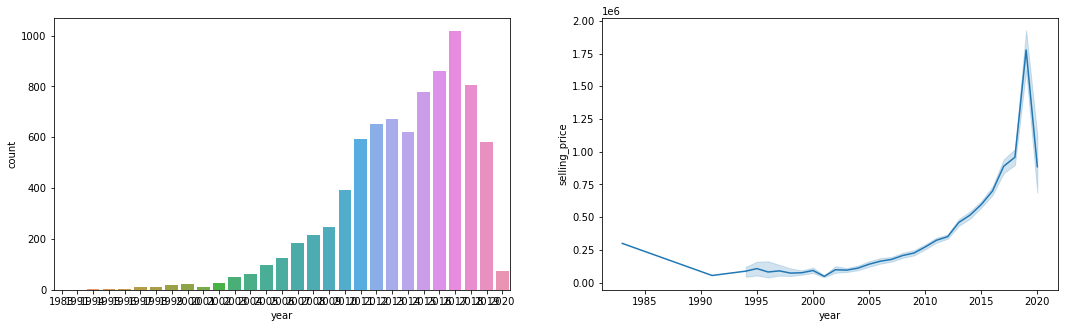

In [11]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.countplot(x = 'year', data = details, ax = axis1)
sns.lineplot(x = 'year', y = 'selling_price', data = details, ax = axis2);

From the above plots we can see that most of the cars are 2-10 years old and the selling price decreases as the car become older and older.

### Selling price vs Km Driven

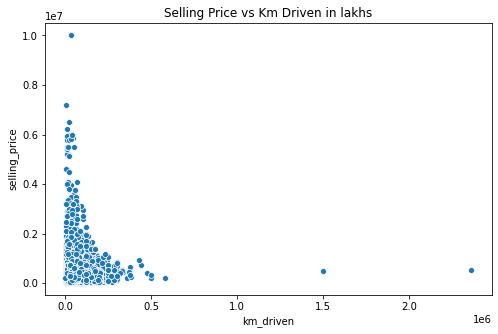

In [12]:
plt.figure(figsize = [8,5])
sns.scatterplot(x = 'km_driven', y = 'selling_price', data = details);
plt.title('Selling Price vs Km Driven in lakhs');

The above plot shows that the less driven cars are usually sold at higher prices.

### Selling price vs Owner

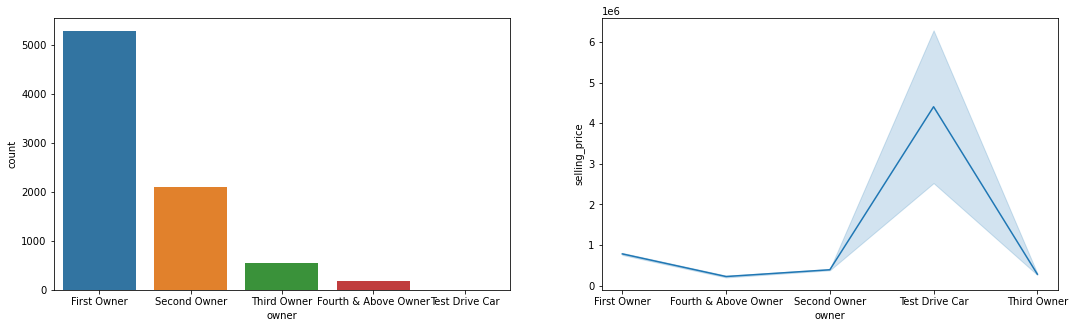

In [13]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.countplot(x = 'owner', data = details, ax = axis1)
sns.lineplot(x = 'owner', y = 'selling_price', data = details, ax = axis2);

From the above plots we can see that most of the cars are sold by their first owners.

### Selling price vs No of seats

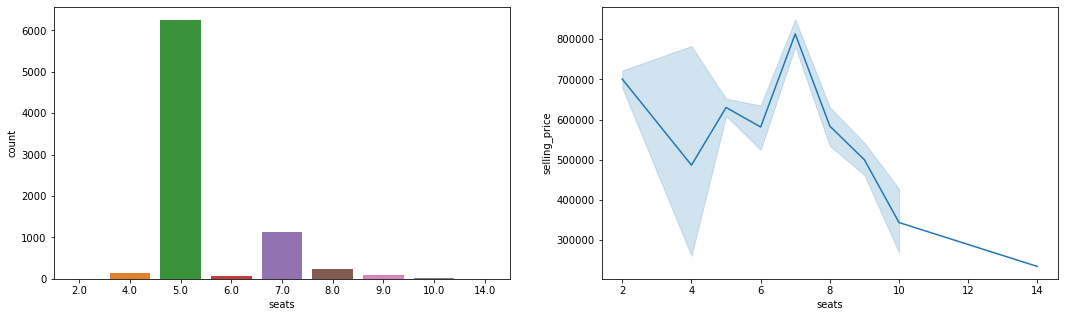

In [14]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.countplot(x = 'seats', data = details, ax = axis1)
sns.lineplot(x = 'seats', y = 'selling_price', data = details, ax = axis2);

Thus we can see the most of the cars sold have 5 seats and their prices are usually between 6 to 7 lakhs.

## Preprocessing of Data

In [15]:
# take only the first 2 words of name column
z = lambda x: x.split()[0] + ' ' + x.split()[1]
details['name'] = details['name'].apply(z)

In [16]:
# convert the values of 'name' column to numerical format
names_dict = {}
def convertNames():
    i = 0
    for col_no, data in details['name'].iteritems():
        if data not in names_dict:
            names_dict[data] = i
            i = i + 1
        details['name'][col_no] = names_dict[data]
    return names_dict[data]

convertNames();

<ipython-input-16-dd0738b66592>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  details['name'][col_no] = names_dict[data]


In [17]:
# drop the rows having null values
details = details[details['torque'].notna()]
# drop the rows having 'Test Drive Car' as Owner type
details = details[details.owner != 'Test Drive Car']

In [18]:
# convert the values of 'fuel' column to numerical format
z = lambda x: 0 if x == 'Diesel' else (1 if x == 'Petrol' else (2 if x == 'CNG' else 3))
details['fuel'] = details['fuel'].apply(z)

In [19]:
# convert the values of 'seller_type' column to numerical format
z = lambda x: 0 if x == 'Individual' else (1 if x == 'Dealer' else 2)
details['seller_type'] = details['seller_type'].apply(z)

In [20]:
# convert the values of 'transmission' column to numerical format
z = lambda x: 0 if x == 'Manual' else 1
details['transmission'] = details['transmission'].apply(z)

In [21]:
# convert the values of 'owner' column to numerical format
z = lambda x: 0 if x == 'First Owner' else (1 if x == 'Second Owner' else (2 if x == 'Third Owner' else 3))
details['owner'] = details['owner'].apply(z)

In [22]:
# convert the values of 'mileage' column to numerical format
z = lambda x: float(str(x).split(' ')[0])
details['mileage'] = details['mileage'].apply(z)

In [23]:
# convert the values of 'engine' column to numerical format
z = lambda x: float(str(x).split(' ')[0])
details['engine'] = details['engine'].apply(z)

In [24]:
# convert the values of 'max_power' column to numerical format
z = lambda x: float(str(x).split(' ')[0])
details['max_power'] = details['max_power'].apply(z)

In [25]:
# drop the columns which are not needed
details.drop(['torque'], axis = 1, inplace = True)

## Machine Learning

In [26]:
# import the required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [27]:
# get the training and test data
(Y, X) = (details['selling_price'].values, details.drop(['selling_price'], axis = 1))
Y = Y.reshape((X.shape[0], 1))

# Scale the values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size = 0.3)
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))

X_train shape:(5530, 11)
Y_train shape:(5530, 1)
X_test shape:(2371, 11)
Y_test shape:(2371, 1)


In [28]:
# helper function to plot True vs Predicted Values plot
def plotPred(Y_pred):
    x_points=np.linspace(0,7e6)
    plt.figure(figsize=(12,5))
    plt.plot(x_points, x_points, color='r')
    plt.scatter(Y_test, Y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True Values Vs Predicted Values');

### Using Linear Regression

Linear Regression train score:  0.67
Linear Regression test score:  0.68
Mean absolute error:  264182.51034835883
Coefficient of determination:  0.6782300527156486


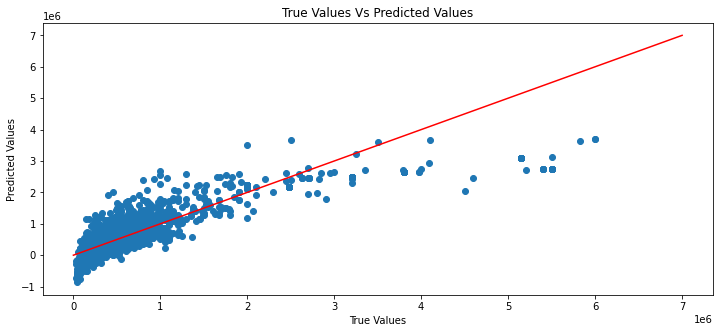

In [29]:
lireg = LinearRegression()
lireg.fit(X_train, Y_train)

# train and test scores
lr_train_score = round(lireg.score(X_train, Y_train), 2)
lr_test_score = round(lireg.score(X_test, Y_test), 2)
# predicted output
Y_pred_lr = lireg.predict(X_test)

print('Linear Regression train score: ', lr_train_score)
print('Linear Regression test score: ', lr_test_score)
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred_lr))
print('Coefficient of determination: ', r2_score(Y_test, Y_pred_lr))

# plot predicted vs true values
plotPred(Y_pred_lr)

### Using Decision Tree Regressor

Decision Tree Regressor train score:  1.0
Decision Tree Regressor test score:  0.95
Mean absolute error:  78799.64129094733
Coefficient of determination:  0.9517353103564519


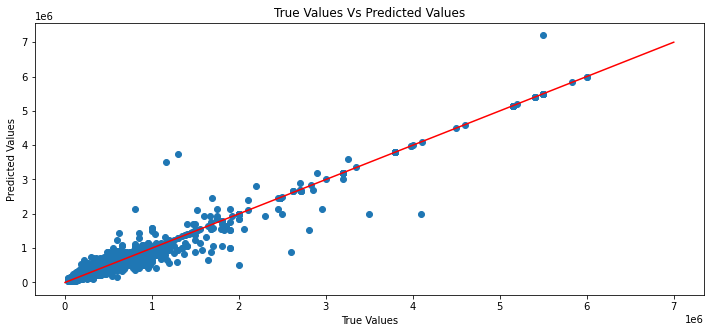

In [30]:
dtreg = DecisionTreeRegressor()
dtreg.fit(X_train, Y_train)

# train and test scores
dt_train_score = round(dtreg.score(X_train, Y_train), 2)
dt_test_score = round(dtreg.score(X_test, Y_test), 2)
# predicted output
Y_pred_dt = dtreg.predict(X_test)

print('Decision Tree Regressor train score: ', dt_train_score)
print('Decision Tree Regressor test score: ', dt_test_score)
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred_dt))
print('Coefficient of determination: ', r2_score(Y_test, Y_pred_dt))

# plot predicted vs true values
plotPred(Y_pred_dt)

### Using Random Forest Regressor

<ipython-input-31-beeede5015c7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train, Y_train)


Decision Tree Regressor train score:  0.99
Decision Tree Regressor test score:  0.97
Mean absolute error:  66510.60892153677
Coefficient of determination:  0.9723289905618039


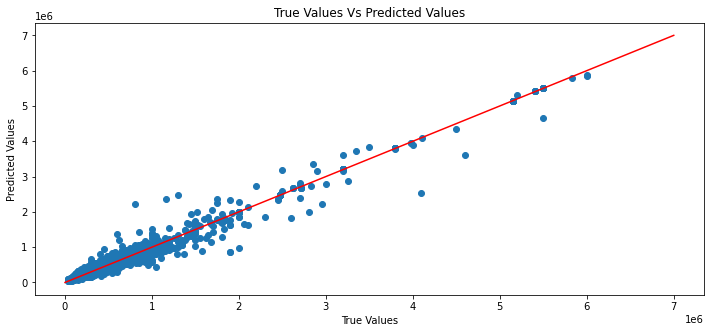

In [31]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train, Y_train)

# train and test scores
rf_train_score = round(rfreg.score(X_train, Y_train), 2)
rf_test_score = round(rfreg.score(X_test, Y_test), 2)
# predicted output
Y_pred_rf = rfreg.predict(X_test)

print('Decision Tree Regressor train score: ', rf_train_score)
print('Decision Tree Regressor test score: ', rf_test_score)
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred_rf))
print('Coefficient of determination: ', r2_score(Y_test, Y_pred_rf))

# plot predicted vs true values
plotPred(Y_pred_rf)